In [1]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm

plt.style.use('fivethirtyeight')

In [2]:
class CFG:
    img_dim1 = 20
    img_dim2 = 10
    
# plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})    

\begin{equation}
X_t = T_t + S_t + C_t + \epsilon_t
\end{equation}

Dedicated notebook: https://www.kaggle.com/konradb/practical-time-series-pt-1-the-basics


In [3]:
df = pd.read_csv('../input/tsdata-1/us_energy.csv')
df.head(3)

,date,value
0,1973-01-01,160.218
1,1973-01-31,143.539
2,1973-03-02,148.158


<AxesSubplot:xlabel='date'>

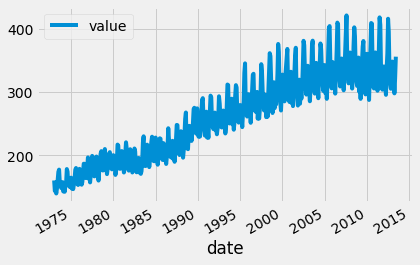

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df.plot()

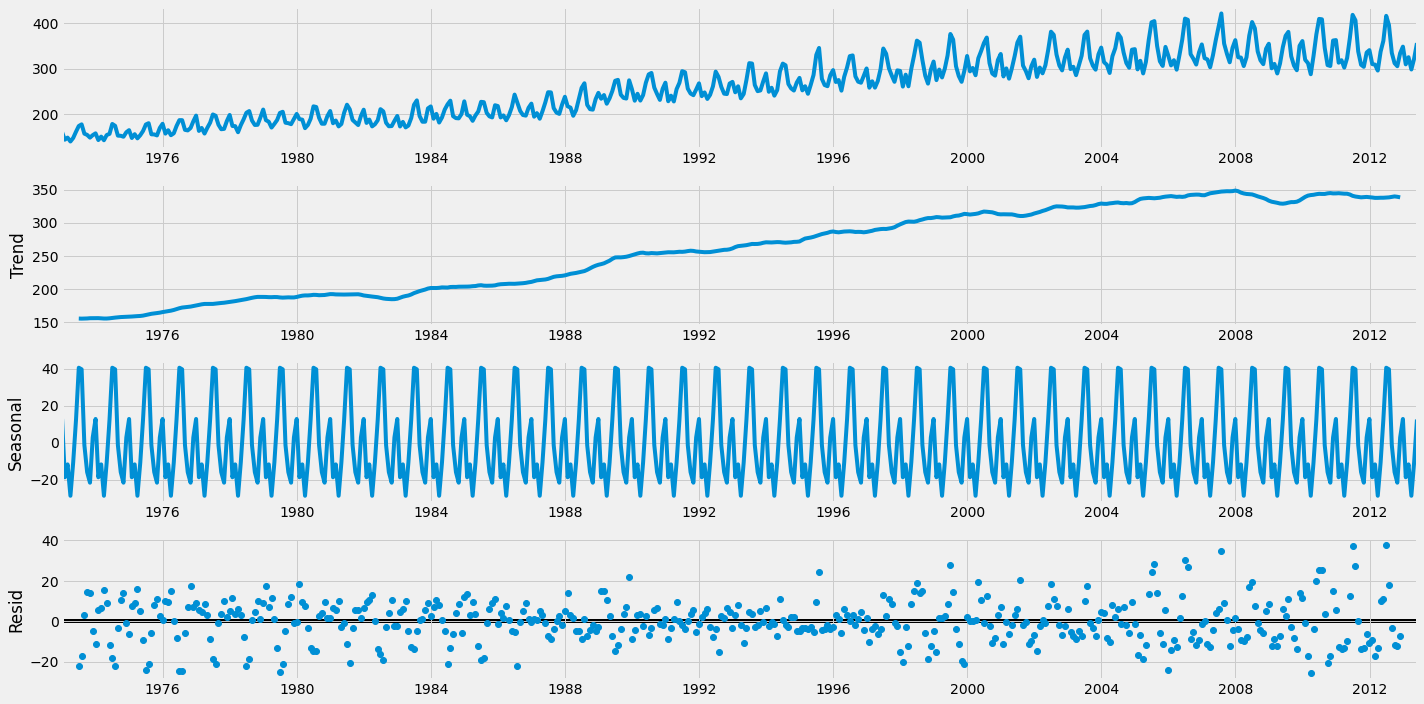

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})

decomposition = seasonal_decompose(df, period = 12)
figure = decomposition.plot()
plt.show()

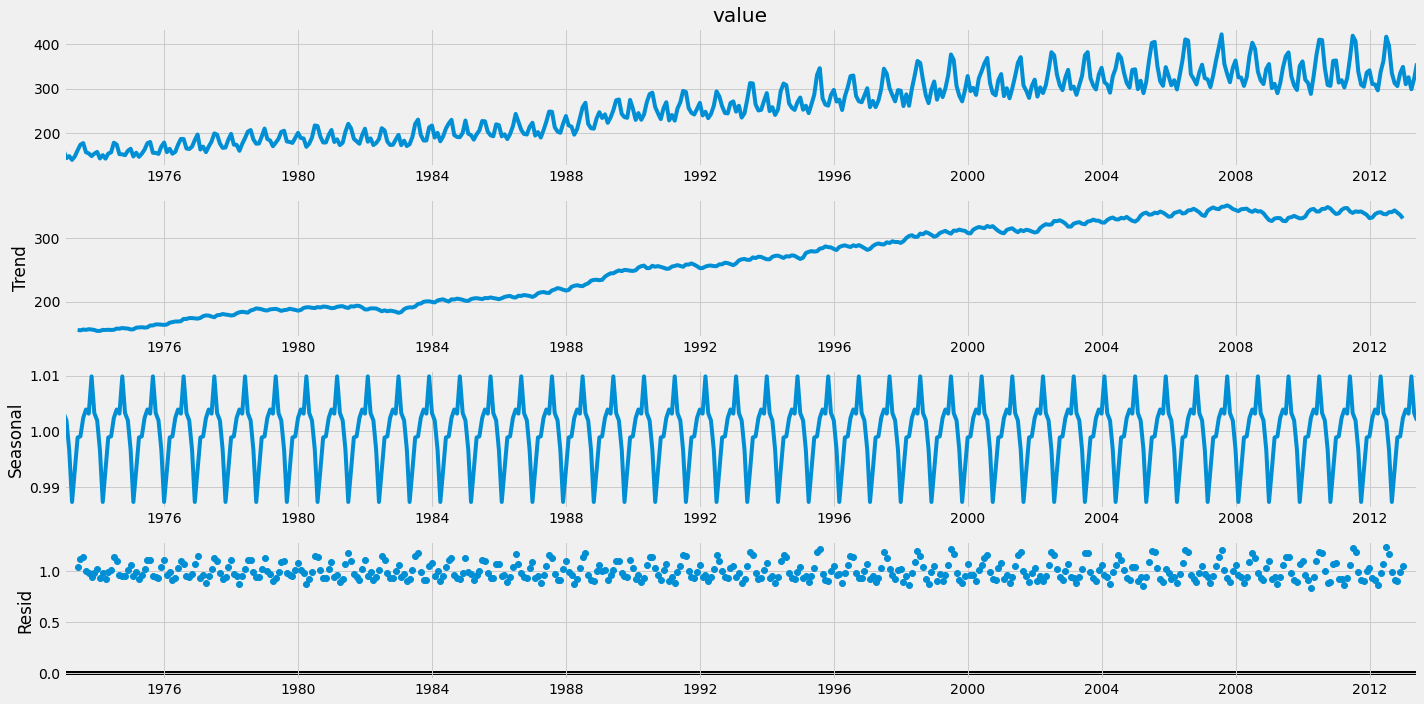

In [6]:
decomposition = seasonal_decompose(df['value'], period = 11, model = 'multiplicative')
figure = decomposition.plot()
plt.show()

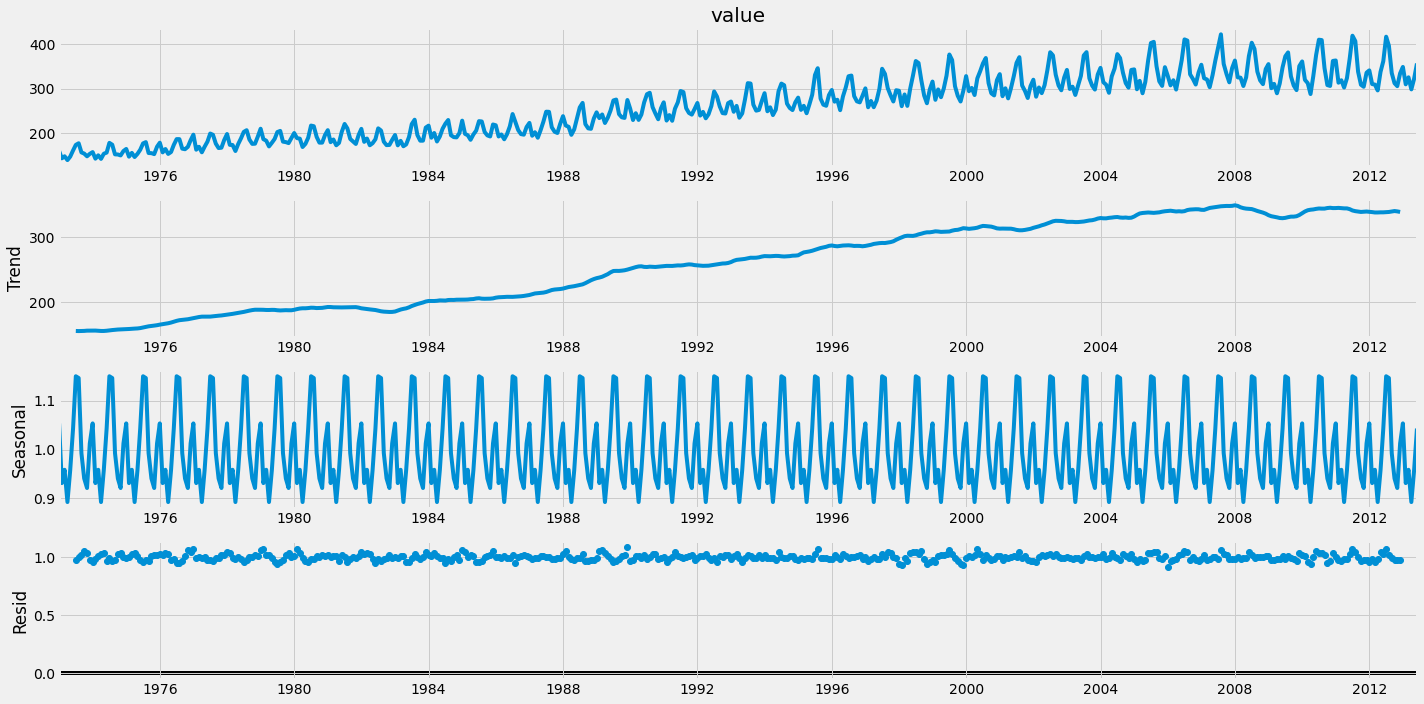

In [7]:
decomposition = seasonal_decompose(df['value'], period = 12, model = 'multiplicative')
figure = decomposition.plot()
plt.show()

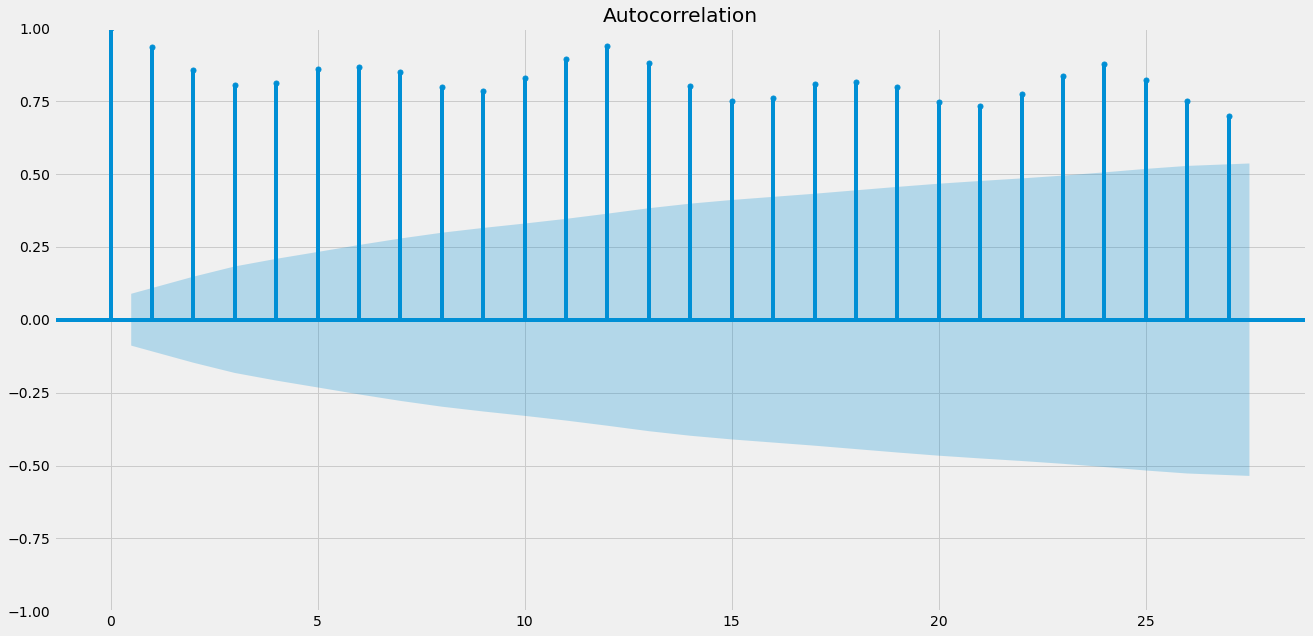

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['value'])
print()

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


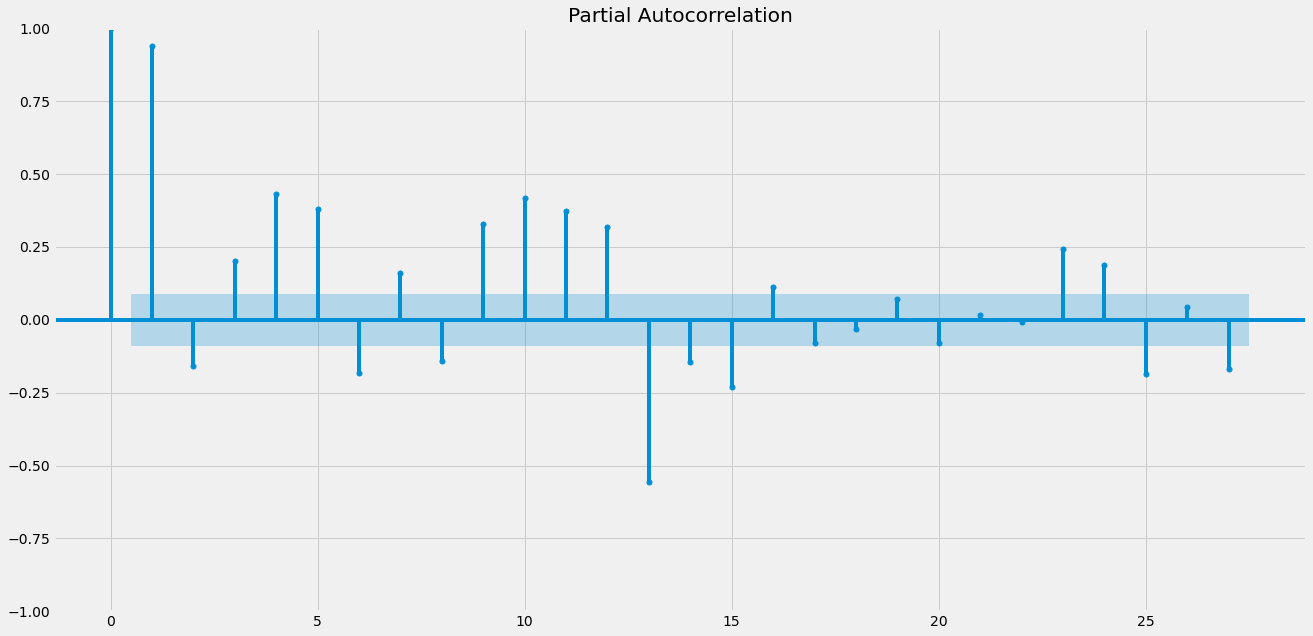

In [9]:
plot_pacf(df['value'])
print()

Dedicated notebook: https://www.kaggle.com/konradb/practical-time-series-pt-2-smoothing-methods

In [10]:
# training / validation split
cutoff_date = '2005-12-31'
df['value'] /= 100
xtrain, xvalid  = df.loc[df.index <= cutoff_date], df.loc[df.index > cutoff_date]
print(xtrain.shape, xvalid.shape)

(397, 1) (89, 1)


In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


fit1 = ExponentialSmoothing(xtrain['value'].values, seasonal_periods = 12,
                           trend = 'mul', seasonal = 'mul')

In [12]:
fit1 = fit1.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [13]:
prediction = fit1.forecast(len(xvalid)).copy()

xresiduals = xvalid['value'] - prediction

In [14]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,2.817337e-01,True
smoothing_trend,beta,2.282012e-17,True
smoothing_seasonal,gamma,2.263638e-01,True
initial_level,l.0,1.516744e+00,True
initial_trend,b.0,1.001948e+00,True
initial_seasons.0,s.0,1.068680e+00,True
initial_seasons.1,s.1,9.413292e-01,True
initial_seasons.2,s.2,9.666175e-01,True
initial_seasons.3,s.3,8.982857e-01,True
initial_seasons.4,s.4,9.486133e-01,True


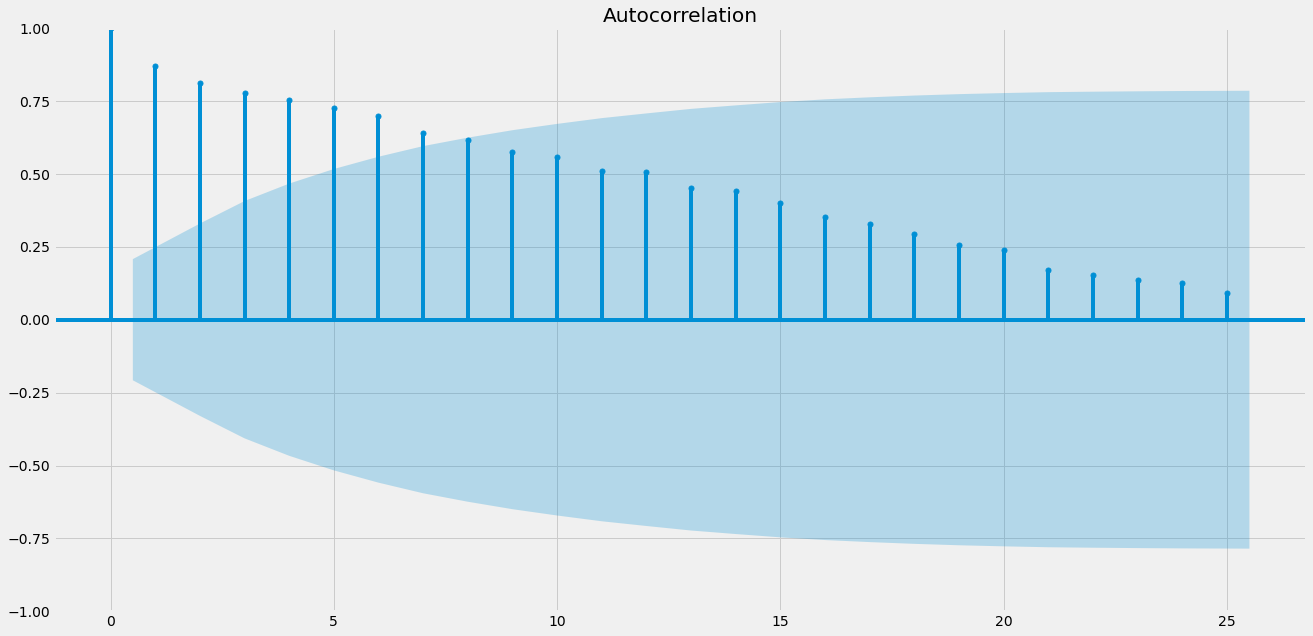

In [15]:
plot_acf(xresiduals, lags = 25)
print()

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


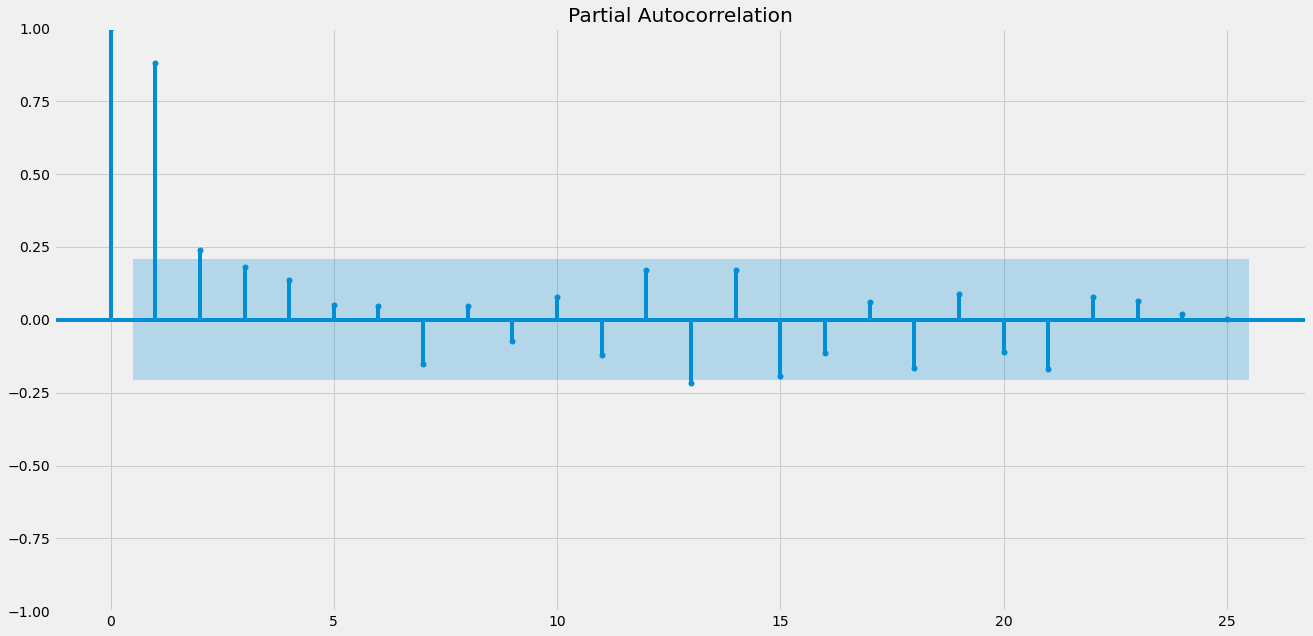

In [16]:
plot_pacf(xresiduals, lags = 25)
print()

Dedicated notebook:  https://www.kaggle.com/konradb/practical-time-series-pt-4-prophet

Dataset: https://www.kaggle.com/piantic/autonomous-greenhouse-challengeagc-2nd-2019

In [17]:
from fbprophet import Prophet

In [18]:
xdat = pd.read_csv('../input/greenhouse-dataset/GreenhouseClimate1.csv')
xdat.head(3)

,time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,43815.00000,0.0,35.000000,439.0,0.48,3.61,96.0,6.96,0.0,50.9,...,NaN,0.0,NaN,25.0,26.0,4.0,NaN,1000.0,NaN,1.2
1,43815.00347,0.0,85.000001,459.0,0.72,3.61,96.0,7.45,0.0,49.3,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2
2,43815.00694,0.0,95.999999,461.0,0.72,3.61,94.6,5.99,0.0,47.6,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2


In [19]:
xdat['time'] = pd.to_datetime(xdat['time'], unit = 'D', origin = "1899-12-30")
xdat.head(3)

,time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,2019-12-16 00:00:00.000000000,0.0,35.000000,439.0,0.48,3.61,96.0,6.96,0.0,50.9,...,NaN,0.0,NaN,25.0,26.0,4.0,NaN,1000.0,NaN,1.2
1,2019-12-16 00:04:59.808000256,0.0,85.000001,459.0,0.72,3.61,96.0,7.45,0.0,49.3,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2
2,2019-12-16 00:09:59.616000000,0.0,95.999999,461.0,0.72,3.61,94.6,5.99,0.0,47.6,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2


In [20]:
list1 = ['time', 'Tair']

list2 = ['co2_sp', 'dx_sp', 't_rail_min_sp', 't_grow_min_sp',
        'assim_sp', 'scr_enrg_sp', 'scr_blck_sp', 't_heat_sp',
        't_vent_sp', 'window_pos_lee_sp', 'water_sup_intervals_sp_min',
        'int_blue_sp', 'int_red_sp', 'int_farred_sp',
        'int_white_sp']

xdat = xdat[list1 + list2]

In [21]:
xdat2 = xdat.resample('H', on = 'time').mean().reset_index()[list1 + list2]

In [22]:
np.isnan(xdat2[['Tair'] + list2]).describe()


,Tair,co2_sp,dx_sp,t_rail_min_sp,t_grow_min_sp,assim_sp,scr_enrg_sp,scr_blck_sp,t_heat_sp,t_vent_sp,window_pos_lee_sp,water_sup_intervals_sp_min,int_blue_sp,int_red_sp,int_farred_sp,int_white_sp
count,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985,3985
unique,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,3983,3945,3944,3944,3878,3944,3944,3944,3945,3945,3944,3901,3985,3985,3985,3985


In [23]:
np.isnan(xdat2[['Tair'] + list2]).describe()

xdat2.dropna(subset = ['Tair'], inplace = True)

<AxesSubplot:>

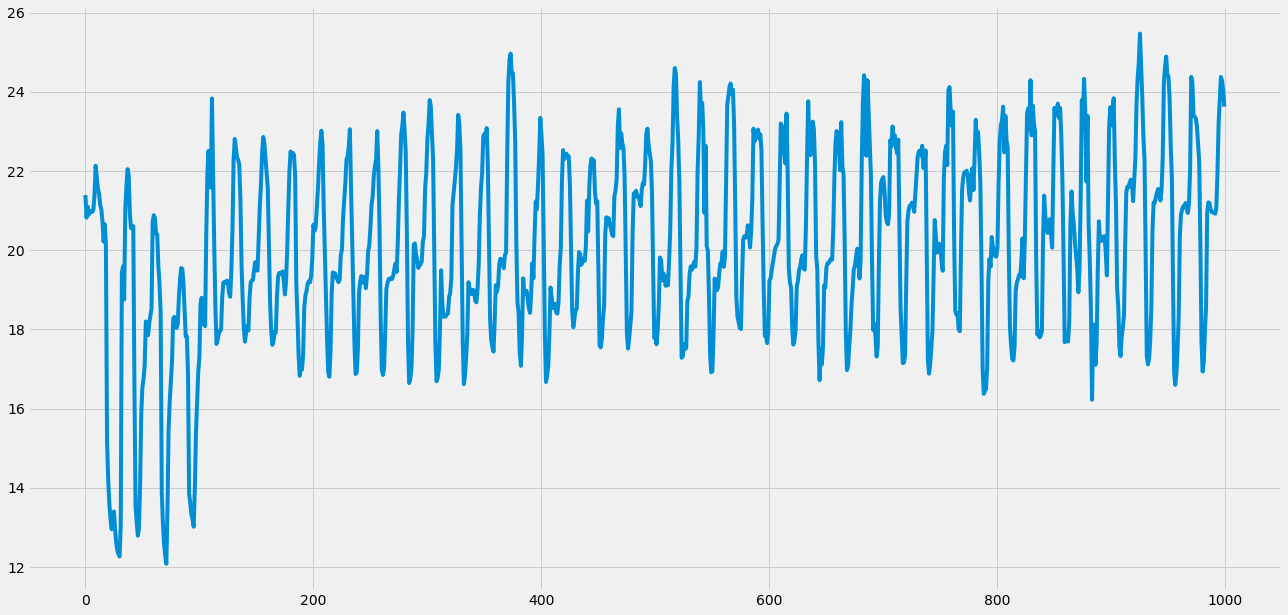

In [24]:
xdat2['Tair'][0:1000].plot()

In [25]:
df = xdat2[['time', 'Tair']].rename(columns={"time": "ds", "Tair": "y"})

In [26]:
m = Prophet(weekly_seasonality=False, 
            interval_width = 0.95,
            mcmc_samples = 10)

In [27]:
m.fit(df)


Gradient evaluation took 0.003314 seconds
1000 transitions using 10 leapfrog steps per transition would take 33.14 seconds.
Adjust your expectations accordingly!


         performed for num_warmup < 20


Gradient evaluation took 0.004921 seconds
1000 transitions using 10 leapfrog steps per transition would take 49.21 seconds.
Adjust your expectations accordingly!


         performed for num_warmup < 20


Gradient evaluation took 0.004885 seconds
1000 transitions using 10 leapfrog steps per transition would take 48.85 seconds.
Adjust your expectations accordingly!


         performed for num_warmup < 20


Gradient evaluation took 0.004382 seconds
1000 transitions using 10 leapfrog steps per transition would take 43.82 seconds.
Adjust your expectations accordingly!


         performed for num_warmup < 20

Iteration: 1 / 10 [ 10%]  (Warmup)
Iteration: 2 / 10 [ 20%]  (Warmup)
Iteration: 1 / 10 [ 10%]  (Warmup)
Iteration: 1 / 10 [ 10%]  (Warmup)
Iteration: 3 / 10 [ 30%]  (Warmup)
Itera

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of th

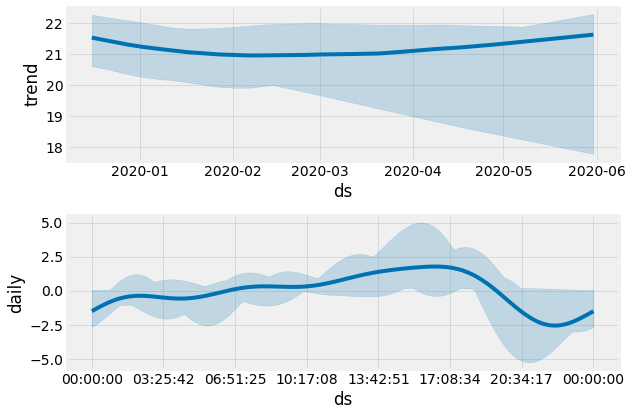

In [28]:
future = m.make_future_dataframe(periods = 24, freq = 'H')
forecast = m.predict(future)
m.plot_components(forecast)
print()

Initial log joint probability = -25.0512
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10300.7     0.0111439        1764.1      0.3729           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10319.5   0.000897444       222.126           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         10324    0.00131037       181.384      0.8045      0.8045      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     376       10324.5   3.76522e-05       121.262    3.91e-07       0.001      515  LS failed, Hessian reset 
     399       10324.6   5.66775e-06        60.397   1.057e-07       0.001      583  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     419       1

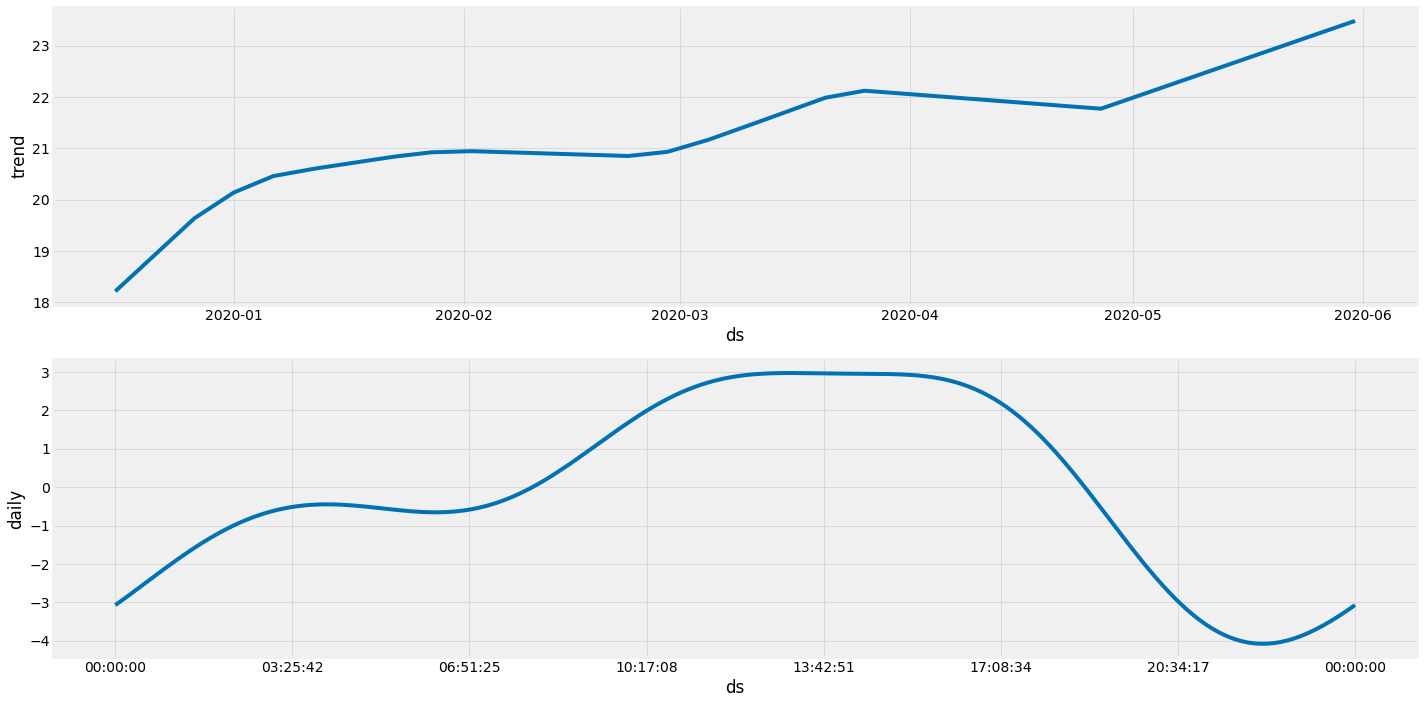

In [29]:
m = Prophet(weekly_seasonality=False, interval_width = 0.95)

m.fit(df)
future = m.make_future_dataframe(periods= 24, freq = 'H')
forecast = m.predict(future)
m.plot_components(forecast, figsize=(CFG.img_dim1, CFG.img_dim2))
print()

In [30]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [31]:
df_cv = cross_validation(m,initial = '3700 hours', period = '24 hours', horizon = '24 hours')
df_cv.head(10)

  0%|          | 0/11 [00:00<?, ?it/s]

Initial log joint probability = -24.5512
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9408.41    0.00705538       459.471           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9421.39     0.0782182       485.221           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9428.26    0.00111548       134.383      0.3095           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9429.73   0.000130834       97.8802      0.3321      0.3321      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499          9430   0.000272408       80.7221       0.979       0.979      628   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-19 00:00:00,18.960971,16.270471,21.917205,18.475000,2020-05-18 23:00:00
1,2020-05-19 01:00:00,19.981934,17.129893,22.899708,18.623077,2020-05-18 23:00:00
2,2020-05-19 02:00:00,20.879895,18.219913,23.589731,19.463636,2020-05-18 23:00:00
3,2020-05-19 03:00:00,21.468382,18.537720,24.355850,19.750000,2020-05-18 23:00:00
4,2020-05-19 04:00:00,21.680767,18.856999,24.268053,20.123077,2020-05-18 23:00:00
5,2020-05-19 05:00:00,21.588026,18.786308,24.361410,20.272727,2020-05-18 23:00:00
6,2020-05-19 06:00:00,21.405115,18.675585,24.107562,20.466667,2020-05-18 23:00:00
7,2020-05-19 07:00:00,21.422889,18.597141,24.254087,22.030769,2020-05-18 23:00:00
8,2020-05-19 08:00:00,21.853250,18.898702,24.592661,23.554545,2020-05-18 23:00:00
9,2020-05-19 09:00:00,22.679548,19.866117,25.543950,24.341667,2020-05-18 23:00:00


In [32]:
df_p1 = performance_metrics(df_cv)
df_p1.head(10)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 03:00:00,4.345274,2.084532,1.871220,0.097022,0.097954,0.884615
1,0 days 04:00:00,5.200849,2.280537,2.071549,0.105279,0.102057,0.856643
2,0 days 05:00:00,5.909014,2.430846,2.219437,0.111473,0.115507,0.793706
3,0 days 06:00:00,6.261375,2.502274,2.292945,0.114890,0.115751,0.741259
4,0 days 07:00:00,5.447567,2.334002,2.122007,0.105547,0.115612,0.804196
5,0 days 08:00:00,3.124092,1.767510,1.479235,0.071379,0.052694,0.919580
6,0 days 09:00:00,1.800709,1.341905,1.079301,0.047788,0.039021,0.986014
7,0 days 10:00:00,2.159082,1.469381,1.204153,0.048903,0.042151,0.961538
8,0 days 11:00:00,2.994679,1.730514,1.461385,0.057782,0.045791,0.884615
9,0 days 12:00:00,3.527553,1.878178,1.533083,0.060270,0.050650,0.832168


In [33]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
# incorporate the climate and irrigation setpoints

xdat2 = xdat2.dropna()

estimator = Ridge()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(xdat2[list2], xdat2['Tair'])
# 
to_keep = xdat2[list2].columns[selector.support_]


print(to_keep)

Index(['dx_sp', 't_vent_sp', 'window_pos_lee_sp'], dtype='object')


In [34]:
df = xdat2[['time', 'Tair']].rename(columns={"time": "ds", "Tair": "y"})

m = Prophet(weekly_seasonality=False, interval_width = 0.95)

# add the regressors to the dataframe holding the data
for f in to_keep:    
    df[f] = xdat2[f]
    m.add_regressor(f)

# the rest proceeds as before. 
m.fit(df)

Initial log joint probability = -33.0434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12338.4   0.000224095       1102.98      0.6169      0.6169      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         12344   0.000853348       586.744           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12345.3    0.00191578       660.732           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12346.9   0.000232679       240.503           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12349.2   0.000232506       596.074      0.8407      0.8407      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [35]:
# we repeat the same evaluation tactic as before
df_cv = cross_validation(m, initial = '3700 hours', period = '24 hours', horizon='24 hours')
df_p2 = performance_metrics(df_cv)

  0%|          | 0/7 [00:00<?, ?it/s]

Initial log joint probability = -27.0123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11846.4   0.000239736       366.278      0.4544      0.4544      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11851.1   0.000175113       360.559           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11852.8    0.00208834       285.407           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11854.9   0.000651216       266.829           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         11856   6.26646e-05        169.52           1           1      560   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [36]:
comparison = pd.DataFrame()
comparison['raw'] = df_p1.mean(axis = 0)[1:]
comparison['covariates'] = df_p2.mean(axis = 0)[1:]

print(comparison)

               raw covariates
mse       9.380771   1.155504
rmse      2.802414   1.010589
mae       2.339779   0.741331
mape      0.095248   0.034017
mdape     0.086298   0.022512
coverage  0.717896   0.852679


Neural Prophet NN component: https://www.arxiv-vanity.com/papers/1911.12436/


In [37]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 502 kB/s            


In [38]:
from neuralprophet import NeuralProphet

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 129


  0%|          | 0/279 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.79E-02, min: 2.07E+00


  0%|          | 0/279 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.79E-02, min: 2.41E+00


  0%|          | 0/279 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.99E-02, min: 2.41E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.51E-02
Epoch[129/129]: 100%|██████████| 129/129 [00:22<00:00,  5.73it/s, SmoothL1Loss=0.00803, MAE=1.16, RMSE=1.49, RegLoss=0]


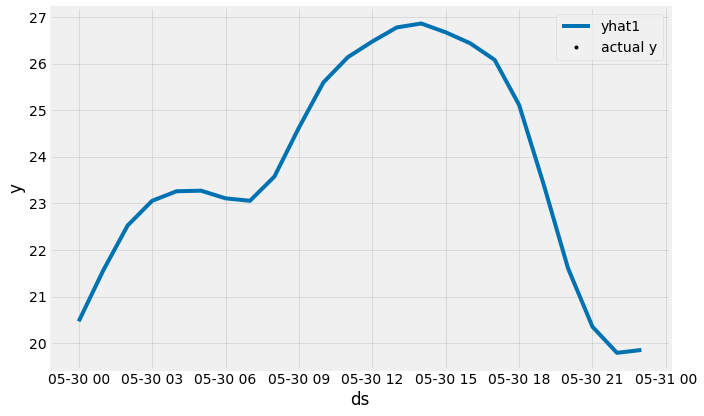

In [39]:
df = xdat2[['time', 'Tair']].rename(columns={"time": "ds", "Tair": "y"})

model = NeuralProphet(weekly_seasonality = False)

model.fit(df, freq="H")
# forecast
df_predict = model.make_future_dataframe(df, periods= 24)
df_predict = model.predict(df_predict)
fig = model.plot(df_predict)